In [21]:
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn import svm
import csv

In [22]:
def checkAccuracy(kernelType):
    C = [1, 10, 100,10000]
    D = [2, 3, 4]
    for c in C:
        for d in D:
            accuracy = numpy.array([],dtype=float)
            clf = svm.SVC(kernel=kernelType, degree=d, C=c)
            for i in range(30):
                kf = KFold(n_splits=10,shuffle=True)
                tmpAccuracy = 0.0
                for train_index, test_index in kf.split(X):
                    X_train, X_test = X[train_index], X[test_index]
                    Label_train, Label_test = Label[train_index], Label[test_index]
                    clf.fit(X_train, Label_train)
                    outputTest = clf.predict(X_test)
                    outputDiff = numpy.subtract(outputTest, Label_test)
                    tmpAccuracy += len(outputDiff) - numpy.count_nonzero(outputDiff)
                tmpAccuracy /= len(Label)
                accuracy = numpy.append(accuracy, tmpAccuracy)
            standardDev = numpy.std(accuracy)
            accuracy = numpy.mean(accuracy)
            print(c, d, accuracy, standardDev)

In [23]:
def plot(kernelType,c,d):
    if kernelType == "poly":
        clf = svm.SVC(kernel=kernelType, degree=d, C=c)
    elif kernelType == "rbf":
        clf = svm.SVC(kernel=kernelType, gamma=d, C=c)
    clf.fit(X, Label)
    h = .002
    # create a mesh to plot in
    x_min = -2
    x_max = 2
    y_min = -2
    y_max = 2
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                         numpy.arange(y_min, y_max, h))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Paired)
    plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Label, marker='o', cmap=plt.cm.coolwarm)
    plt.xlabel('v1')
    plt.ylabel('v2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


Polynomial Kernel
(1, 2, 0.96416666666666662, 0.011908213785264169)
(1, 3, 0.42083333333333339, 0.02359672764506883)
(1, 4, 0.79533333333333334, 0.032632635334721105)
(10, 2, 0.96483333333333332, 0.0020344259359556189)
(10, 3, 0.44949999999999996, 0.024978323936298577)
(10, 4, 0.90033333333333343, 0.018299969641747755)
(100, 2, 0.97483333333333355, 0.00089752746785575139)
(100, 3, 0.47383333333333327, 0.025745010304048344)
(100, 4, 0.93566666666666665, 0.011160446028522102)
(10000, 2, 0.98549999999999982, 0.0019790570145063213)
(10000, 3, 0.47066666666666668, 0.022425184255405545)
(10000, 4, 0.95733333333333337, 0.0028087165910587889)
Plotting graph for C=10000, d=2


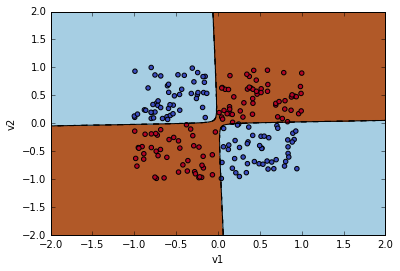

('RBF Kernel', 100, 4)
(1, 2, 0.95916666666666661, 0.0086682690826305683)
(1, 3, 0.95633333333333326, 0.011323525167642014)
(1, 4, 0.96083333333333332, 0.0086682690826305597)
(10, 2, 0.96950000000000003, 0.0053774219349672307)
(10, 3, 0.96766666666666645, 0.0046067583203617561)
(10, 4, 0.96883333333333332, 0.0038042374035044458)
(100, 2, 0.97949999999999993, 0.0047169905660283057)
(100, 3, 0.97766666666666668, 0.0038151743807532026)
(100, 4, 0.97883333333333356, 0.0044127340982912456)
(10000, 2, 0.97799999999999998, 0.0054160256030906448)
(10000, 3, 0.97850000000000015, 0.0064743081998516827)
(10000, 4, 0.97966666666666657, 0.0057638721552635335)
Plotting graph for C=100, gamma=4


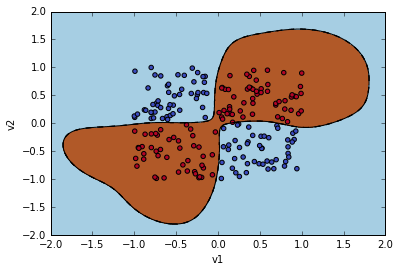

In [24]:
if __name__ == "__main__":
    Label = numpy.array([], dtype=int)
    X = numpy.empty((0,2), float)
    with open('Data_SVM.csv','r') as fHandle:
        reader = csv.reader(fHandle)
        next(reader)
        for row in reader:
            Label = numpy.append(Label, (int(row[-1])))
            row = row[:-1]
            X = numpy.vstack((X, numpy.asarray([float(x) for x in row])))
    print("Polynomial Kernel")
    checkAccuracy('poly')
    print("Plotting graph for C=10000, d=2")
    plot('poly',10000,2)
    print("RBF Kernel",100,4)
    checkAccuracy('rbf')
    print("Plotting graph for C=100, gamma=4")
    plot('rbf',100,4)